This Jupyter Notebook goes through the stages required to:
- Import share data from the internet
- Produce a candlestick chart with volume
- Calculate SMA and EMA
- Plot the moving average measures against the closing price

In [1]:
# Import required modules
import pandas as pd
import numpy as np
from datetime import datetime
import mplfinance as mfp
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Gather stock data
#This is a limited subset just for graphing purposes
start = datetime(2021,6,1)
end = datetime(2022,6,1)
pdr_bae_data = pdr.DataReader("BA.L",'yahoo',start,end)

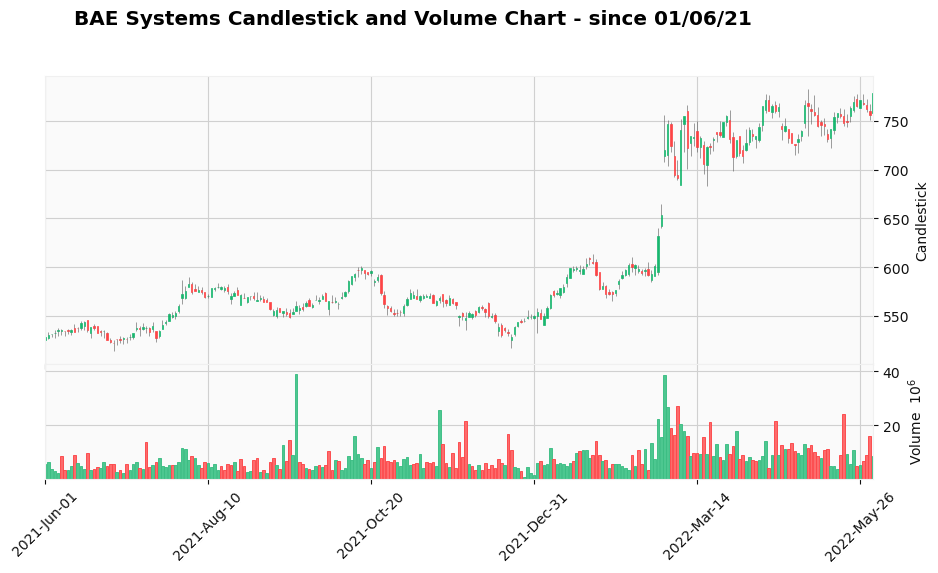

In [3]:
#Create a candlestick chart with volume

#set up a kwarg to manage chart variables
kwargs = dict(type='candlestick',title = 'BAE Systems Candlestick and Volume Chart - since 01/06/21',
              ylabel = 'Candlestick',figratio=(2,1),figscale=1, volume = True,xlim=(start,end))

mfp.plot(pdr_bae_data, **kwargs, style='yahoo')

In [4]:
#Create Technical Analysis measures SMA, EMA_12, EMA_26
#Re-import stock data for the entire data range to demosntrate how quickly pandas can calculate over large datasets
start = datetime(1988,7,1)
end = datetime(2022,6,1)
pdr_bae_data = pdr.DataReader("BA.L",'yahoo',start,end)

SMA_period = 50 #Set the time period for SMA to be evaluated over
pdr_bae_data['SMA'] = pdr_bae_data['Close'].rolling(SMA_period).mean()

pdr_bae_data['EMA_12'] = pdr_bae_data['Close'].ewm(span=12,adjust=False).mean()
pdr_bae_data['EMA_26'] = pdr_bae_data['Close'].ewm(span=26,adjust=False).mean()

pdr_bae_data

,High,Low,Open,Close,Volume,Adj Close,SMA,EMA_12,EMA_26
Date,,,,,,,,,
1988-07-01,100.918602,100.918602,100.918602,100.918602,0.0,34.474159,NaN,100.918602,100.918602
1988-07-04,100.918602,100.918602,100.918602,100.918602,0.0,34.474159,NaN,100.918602,100.918602
1988-07-05,102.384804,102.384804,102.384804,102.384804,0.0,34.975021,NaN,101.144171,101.027210
1988-07-06,100.674301,100.674301,100.674301,100.674301,0.0,34.390701,NaN,101.071884,101.001068
1988-07-07,98.963799,98.963799,98.963799,98.963799,0.0,33.806389,NaN,100.747563,100.850159
...,...,...,...,...,...,...,...,...,...
2022-05-26,771.000000,763.000000,763.000000,771.000000,5179317.0,771.000000,743.895997,757.931156,750.892411
2022-05-27,777.400024,766.200012,768.000000,766.799988,6744046.0,766.799988,744.583997,759.295591,752.070750
2022-05-30,772.400024,758.599976,766.000000,761.599976,8815339.0,761.599976,745.695996,759.650112,752.776619


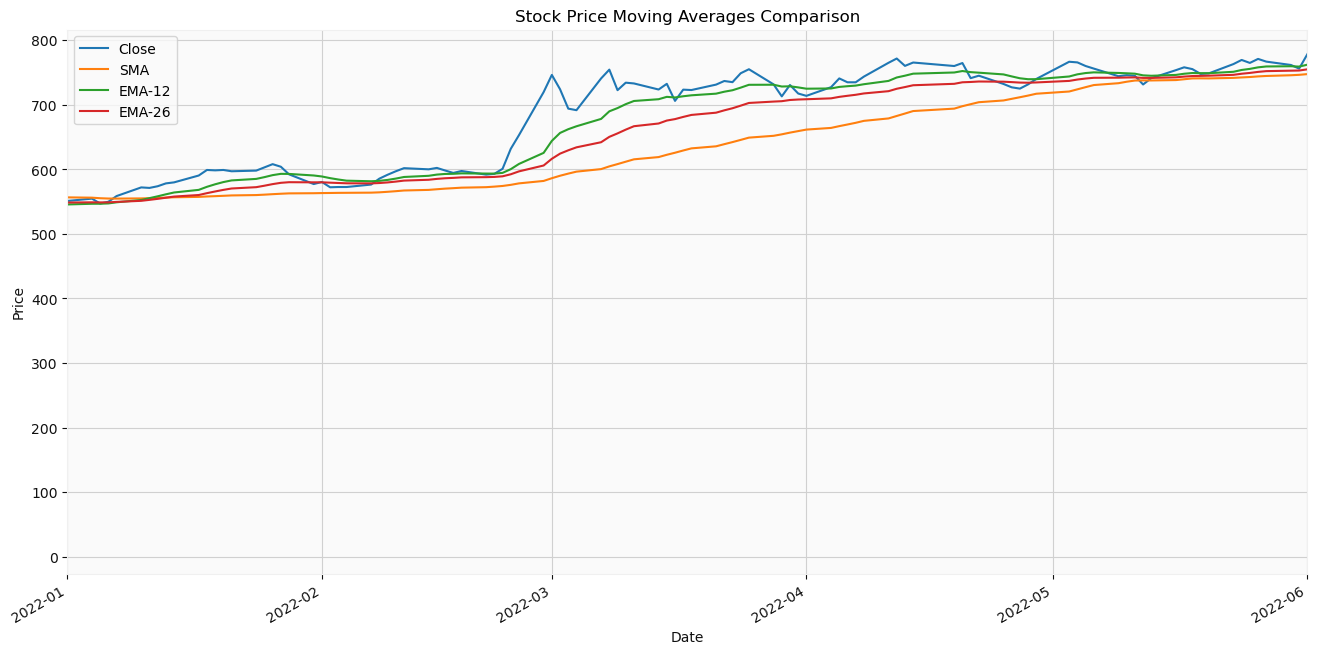

In [5]:
#Plot the various technical measures just evaluated
pdr_bae_data['Close'].plot(label='Close',figsize=(16,8))
pdr_bae_data['SMA'].plot(label='SMA')
pdr_bae_data['EMA_12'].plot(label='EMA-12')
pdr_bae_data['EMA_26'].plot(label='EMA-26')
_=plt.xlabel('Date')
_=plt.ylabel('Price')
_=plt.title('Stock Price Moving Averages Comparison')
plt.xlim(datetime(2022,1,1),end) #start x-axis at the start of this year so the different series are discernible
plt.legend();